### Import Statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

Csv to DataFrame

In [65]:
colors = pd.read_csv('data/colors.csv')
sets  = pd.read_csv("data/sets.csv")
themes = pd.read_csv('data/themes.csv')

id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f

In [66]:
colors.head()

id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f

การแสดงจำนวนข้อมูลที่ซ้ำซ้อน

In [29]:
colors['name'].nunique()

135

In [30]:
colors.groupby('is_trans').count() 

id  name  rgb
is_trans                
f         107   107  107
t          28    28   28

In [31]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [32]:
sets.sort_values('year').head()

set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12

In [33]:
sets[sets['year'] == 1949]

set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12

In [34]:
sets.sort_values('num_parts', ascending=False).head()

set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922

In [35]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [36]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

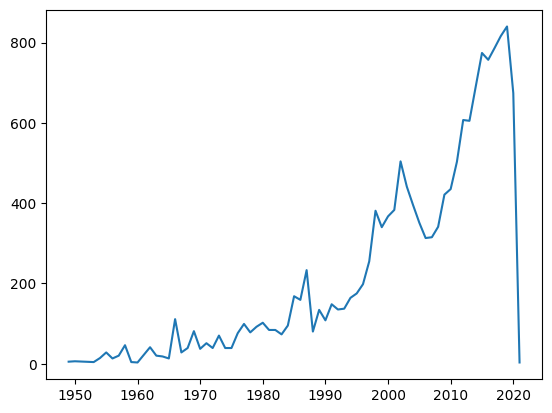

In [63]:
plt.plot(sets_by_year.index.to_numpy(), sets_by_year.set_num.to_numpy())

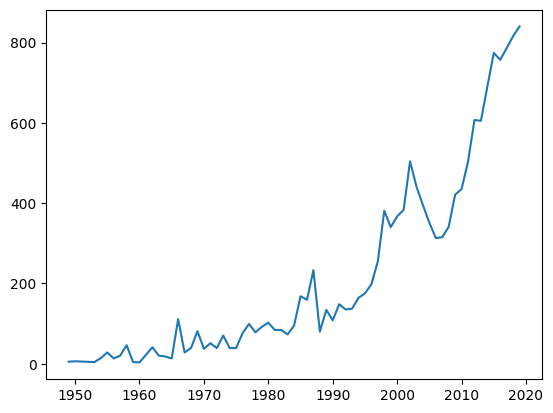

In [58]:
plt.plot(sets_by_year.index.to_numpy()[:-2], sets_by_year.set_num.to_numpy()[:-2])



- agg คือ Aggregate การใช้ 1 operations ขึ้นไปบน axis ที่ต้องการ
- rename คือ การเปลี่ยนแปลงชื่อของ columns

In [39]:
themes_by_year = sets.groupby('year').agg({'theme_id' : pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id' : 'nr_themes'}, inplace=True)

themes_by_year.head()

nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4

In [40]:
themes_by_year.tail()

nr_themes
year           
2017         89
2018         93
2019         78
2020         82
2021          1

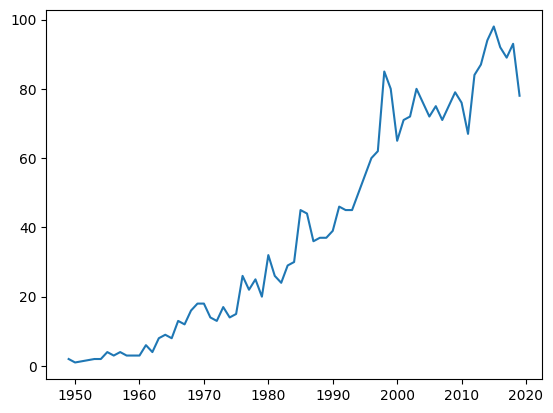

In [59]:
plt.plot(themes_by_year.index.to_numpy()[:-2], themes_by_year.nr_themes.to_numpy()[:-2])

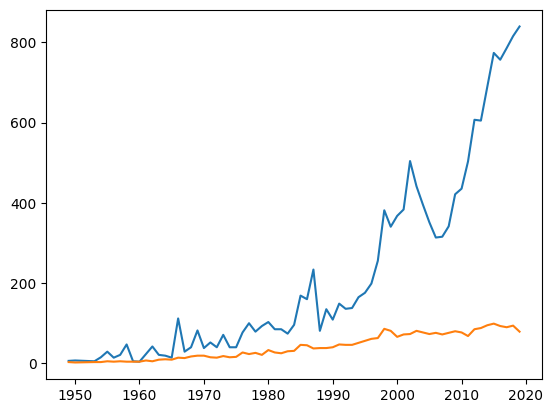

In [60]:
plt.plot(sets_by_year.index.to_numpy()[:-2], sets_by_year.set_num.to_numpy()[:-2])
plt.plot(themes_by_year.index.to_numpy()[:-2], themes_by_year.nr_themes.to_numpy()[:-2])

Text(0, 0.5, 'Number of Themes')

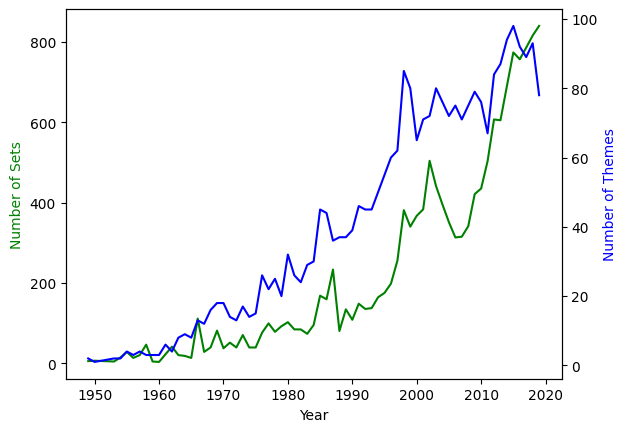

In [61]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.plot(sets_by_year.index.to_numpy()[:-2], sets_by_year.set_num.to_numpy()[:-2], color='g')
ax2.plot(themes_by_year.index.to_numpy()[:-2], themes_by_year.nr_themes.to_numpy()[:-2], color="b")

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color="green")
ax2.set_ylabel('Number of Themes', color="blue")

In [44]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

num_parts
year           
1949  99.600000
1950   1.000000
1953  13.500000
1954  12.357143
1955  36.607143

การสร้างกราฟแบบจุด Scatter ด้วยคำสั่ง scatter

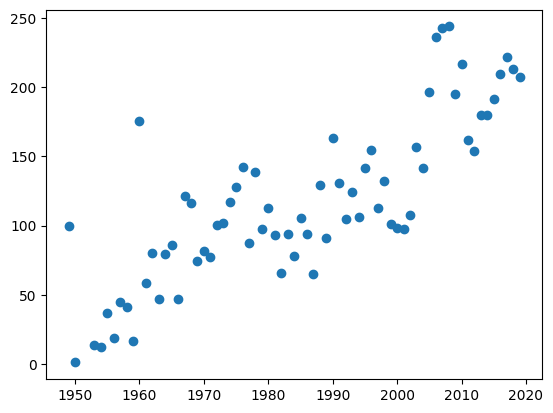

In [64]:
plt.scatter(parts_per_set.index.to_numpy()[:-2], parts_per_set.num_parts.to_numpy()[:-2])

In [46]:
themes.head()

id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0

In [47]:
themes[themes.name == "Star Wars"]

id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0

In [48]:
sets[sets.theme_id == 209]
# sets[sets.theme_id == 18]

set_num                            name  year  theme_id  num_parts
11013  75023-1  Star Wars Advent Calendar 2013  2013       209        254
11046  75056-1  Star Wars Advent Calendar 2014  2014       209        273
11080  75097-1  Star Wars Advent Calendar 2015  2015       209        291
11131  75146-1  Star Wars Advent Calendar 2016  2016       209        282
11173  75184-1  Star Wars Advent Calendar 2017  2017       209        309
11206  75213-1  Star Wars Advent Calendar 2018  2018       209        307
11245  75245-1  Star Wars Advent Calendar 2019  2019       209        280
11281  75279-1  Star Wars Advent Calendar 2020  2020       209        312
12019   7958-1  Star Wars Advent Calendar 2011  2011       209        267
14352   9509-1  Star Wars Advent Calendar 2012  2012       209        235

In [49]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count = pd.DataFrame({ 'id' : set_theme_count.index, 'set_count' : set_theme_count.values})

set_theme_count[:5]

id  set_count
0  158        753
1  501        656
2  494        398
3  435        356
4  503        329

การ Merge ข้อมูล DataFrame

In [50]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

id  set_count       name  parent_id
0  158        753  Star Wars        NaN
1  501        656       Gear        NaN
2  494        398    Friends        NaN

การสร้างกราฟแท่งด้วยคำสั่ง bar

<BarContainer object of 10 artists>

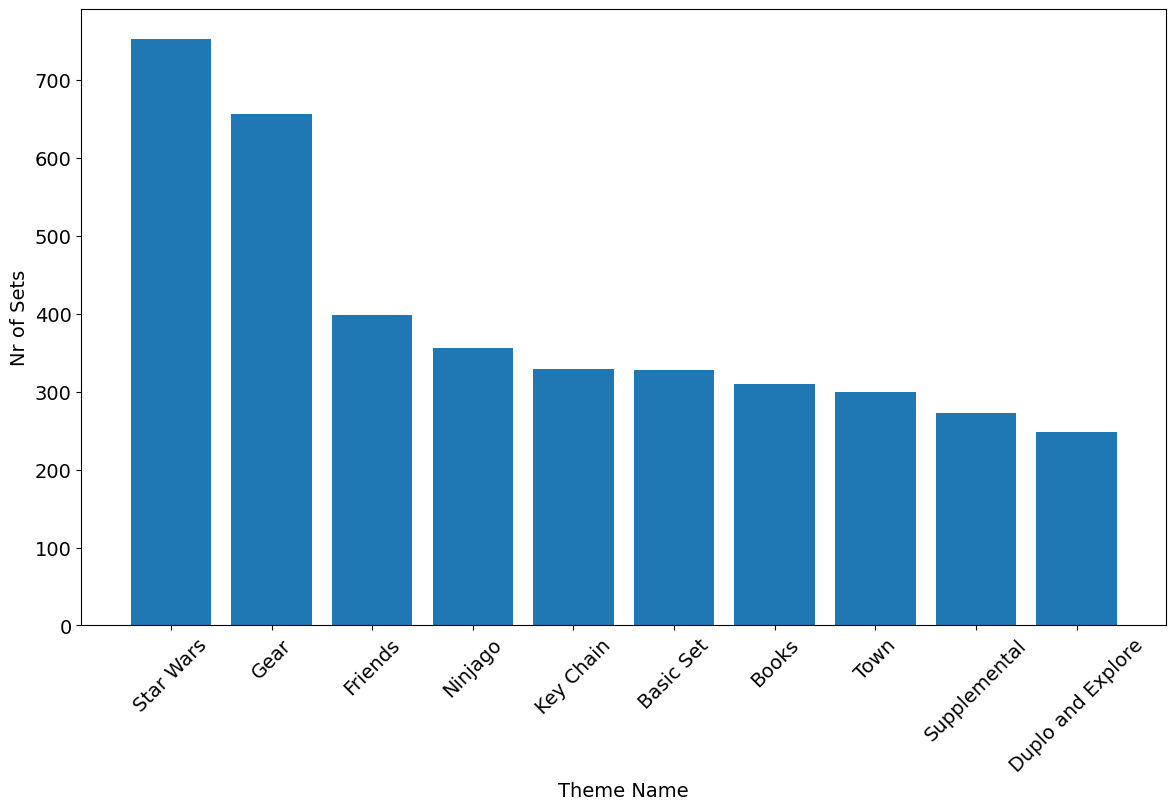

In [51]:
plt.figure(figsize=(14, 8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)


plt.bar(merged_df.name[:10], merged_df.set_count[:10])